Loading historical data from cache...
Loading historical data from cache...
Loading historical data from cache...
Screening log returns for 1 day 1 year data
Shapiro-Wilk Test Statistic: 0.9759154305891294, p-value: 0.000291925864101907
K-S Test Statistic: 0.08130435891783977, p-value: 0.06845744616909977
Skewness: -0.42279525829821
Kurtosis: 3.9573236943655608


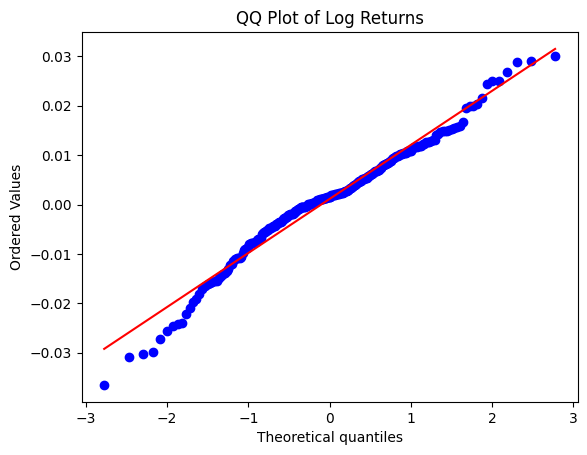

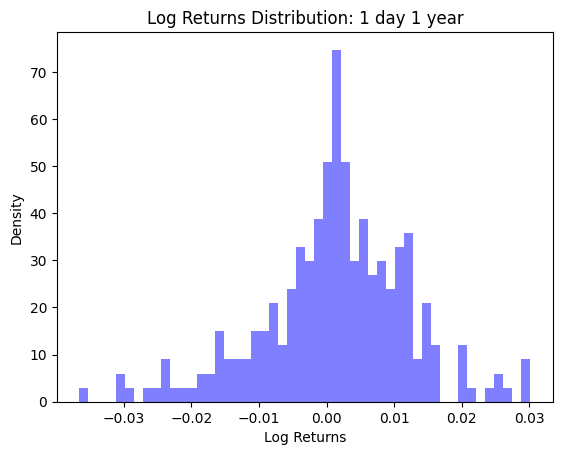

Screening log returns for 1 day 3 months data
Shapiro-Wilk Test Statistic: 0.9616358424823659, p-value: 0.050092660960919494
K-S Test Statistic: 0.10713052267770051, p-value: 0.4444144682535536
Skewness: -0.3137618278664099
Kurtosis: 4.398911727425705


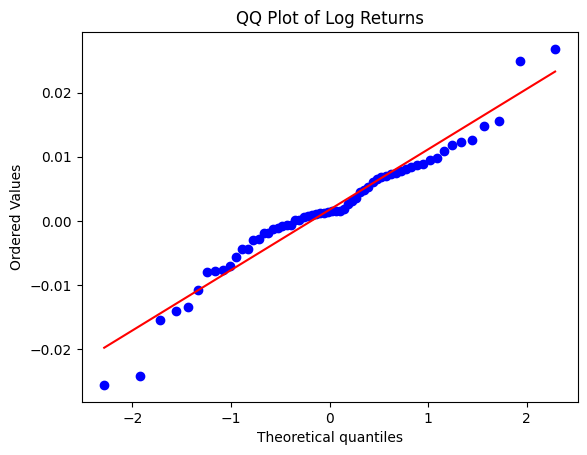

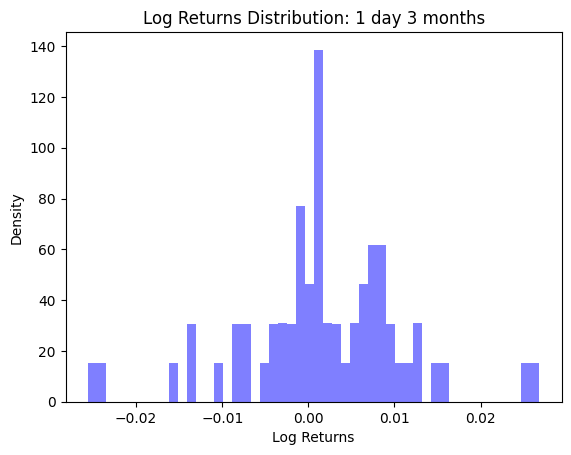

Screening log returns for 1mo 15 mins data
Shapiro-Wilk Test Statistic: 0.852113627738118, p-value: 2.095160327686967e-21
K-S Test Statistic: 0.10572438431911424, p-value: 2.176897603179381e-05
Skewness: -0.8563608970350586
Kurtosis: 19.565078388479385


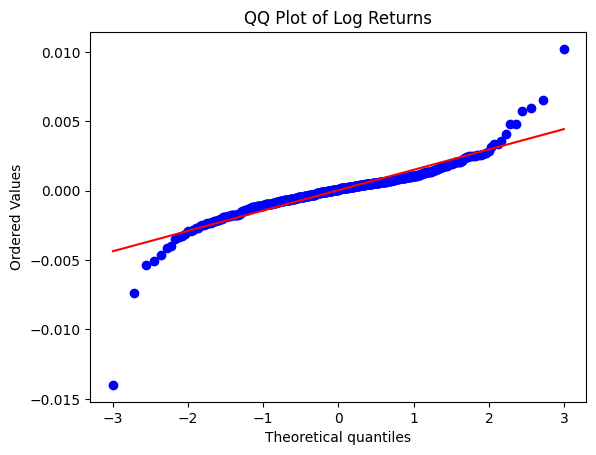

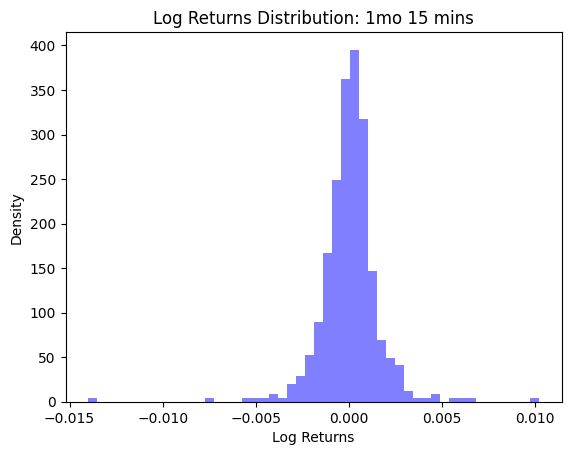

Screening log returns for max data
Shapiro-Wilk Test Statistic: 0.9367762139533469, p-value: 2.334074782112094e-37
K-S Test Statistic: 0.08780908160475542, p-value: 9.515948037302567e-26
Skewness: -0.5136839639501033
Kurtosis: 9.570456668784239


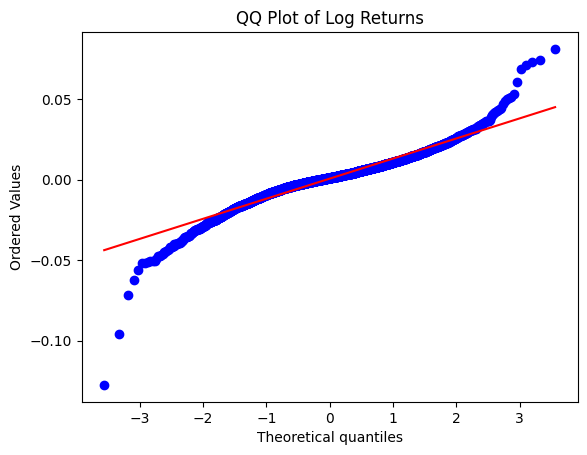

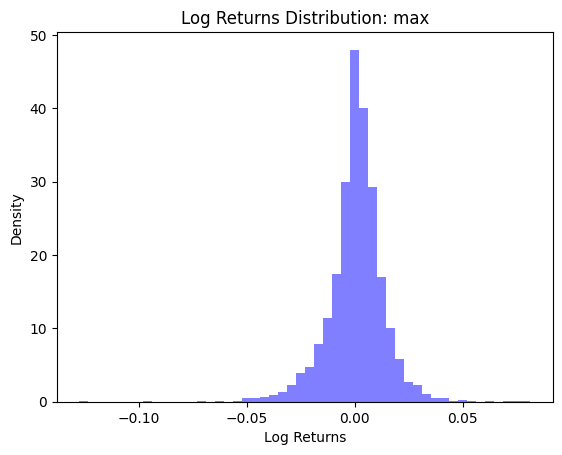

<Figure size 640x480 with 0 Axes>

In [2]:
# We screen the log returns of the data and evaluate how well it fits a normal distribution.
# If it is not suitable, we will need to adjust the priors for the model.
# Suitibility can be evaluated by looking at the posterior predictive checks.

from backtester import Backtester
import numpy as np
from scipy.stats import shapiro, kstest, norm, skew, kurtosis, probplot
import matplotlib.pyplot as plt


stock = 'QQQ'

if __name__ == "__main__":
    backtester = Backtester(stock, 'SMART', 'USD')
    # different time frames
    datas = [
        ('1 day 1 year', backtester.one_yr_1d_data),
        ('1 day 3 months', backtester.three_mo_1d_data),
        ('1mo 15 mins', backtester.one_mo_15min_data),
        ('max', backtester.max_1d_data)
    ]
    for (name,data) in datas:
        log_returns = np.log(data['close']).diff().dropna()
        print(f"Screening log returns for {name} data")
        # Shapiro-Wilk test for normality
        stat, p_value = shapiro(log_returns)
        print(f"Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}")

        # Kolmogorov-Smirnov test against normal distribution
        mean, std = log_returns.mean(), log_returns.std()
        stat, p_value = kstest(log_returns, 'norm', args=(mean, std))
        print(f"K-S Test Statistic: {stat}, p-value: {p_value}")

        # Compute skewness and kurtosis
        log_skewness = skew(log_returns)
        log_kurtosis = kurtosis(log_returns, fisher=False)  # Use fisher=False for Pearson kurtosis

        # Recall that a normal distribution has skewness of 0 and kurtosis of 3
        # if kurtosis is less than 3, the distribution is platykurtic (light tails)
        # if kurtosis is greater than 3, the distribution is leptokurtic (heavy tails)
        print(f"Skewness: {log_skewness}")
        print(f"Kurtosis: {log_kurtosis}")

        # QQ plot against normal distribution - if the data is normally distributed, the points should lie on the diagonal line 
        probplot(log_returns, dist="norm", plot=plt)
        plt.title("QQ Plot of Log Returns")
        plt.show()

        # save histogram
        plt.hist(log_returns, bins=50, color='blue', alpha=0.5, density=True)
        plt.title(f"Log Returns Distribution: {name}")
        plt.xlabel("Log Returns")
        plt.ylabel("Density")
        plt.savefig(f"output/{stock}_log_returns_{name}.png")
        plt.show()
        plt.clf()



